In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Mutual information scores

In [3]:
eleventh_it = pd.read_pickle("data/eleventh_iteration.pkl")

In [4]:
X = eleventh_it.copy()
y = X.pop("median_house_value")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [5]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

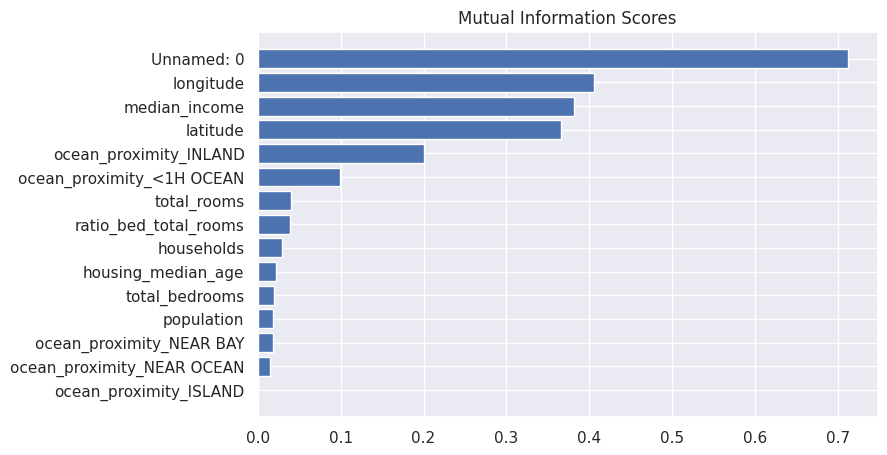

In [10]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Correlation

In [7]:
immo_df = pd.read_csv("data/immo.csv")

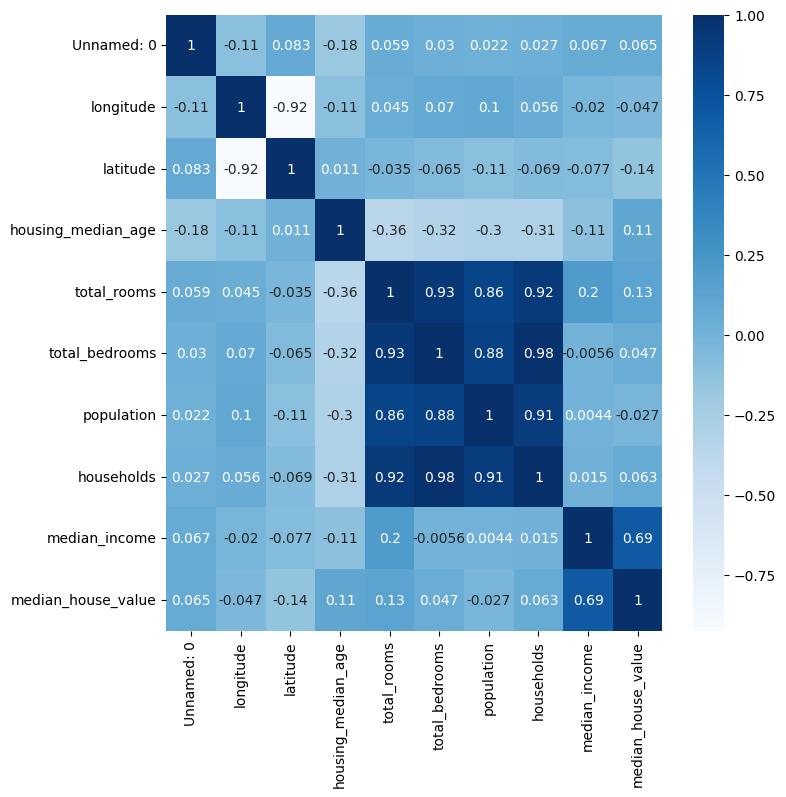

In [9]:
plt.figure(figsize=(8,8))
cor = immo_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()